In [ ]:
! pip install emoji

In [ ]:

!pip install vaderSentiment

In [ ]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import emoji
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer                     


In [ ]:
tweet_df = pd.read_csv('covide_df.csv')
tweet_df.head()

# Cleaning

In [ ]:
def clean_tweets(text):
  text=re.sub(r'@[A-Za-z0–9]+','',text) #remove @mentions
  text=re.sub(r'#','',text) #remove #
  text=re.sub(r'RT[\s]+','',text) # remove RT
  text=re.sub(r'https?:\/\/\S+','',text) #remove URL 
  text=re.sub(emoji.get_emoji_regexp(),r'',text) #remove emojies

  return text

In [ ]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Analyse des sentiment 

In [ ]:
tweet_df[['polarity', 'subjectivity']] = tweet_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
pc=count_values_in_column(tweet_df,'sentiment')

In [ ]:
pc

,Total,Percentage
negative,345,34.5
positive,344,34.4
neutral,311,31.1


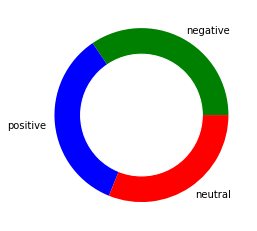

In [ ]:

names= pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()